In [1]:
import numpy as np
import pandas
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import cv2

In [2]:
TRAIN_DIR = '/Users/songyihe/Documents/Study/AI_Projects/large-datasets/human-face/xy.pkl'

# Explantory Data Analyisis - Take a Glance at the Data

Data Shape

In [3]:
import pickle
from matplotlib import pyplot as plt

In [4]:
with open(TRAIN_DIR, 'rb') as whdl:
    (IM_train,y_train,IM_test) = pickle.load(whdl)

In [5]:
len(IM_train)

58512

In [6]:
IM_train[0].shape

(100, 100, 3)

In [7]:
len(y_train)

58512

In [8]:
IM_test[0].shape

(250, 250, 3)

Observation: IM_train contains 58512 100\*100\*3 pictures. y_train contains 58512 labels. IM_test contains 250\*250\*3 pictures. 

Picture Examples

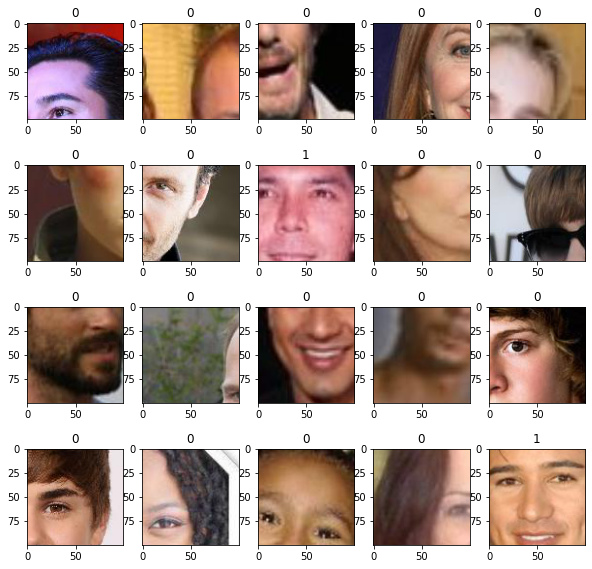

In [9]:
plt.figure(figsize=(10,10))
for i in range(20):
    index = int(np.random.uniform(low=0, high=58511))
    plt.subplot(4,5,i + 1)
    plt.imshow(IM_train[index])
    plt.title(y_train[index])

Observation: The label shows whether it's a human face.

Channel Examples

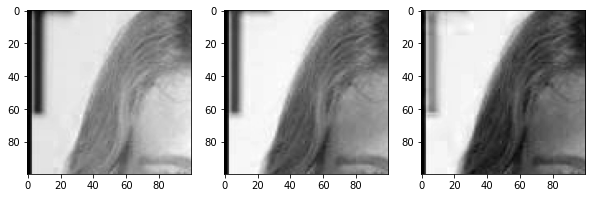

In [10]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i + 1)
    plt.imshow(IM_train[0][:,:,i],cmap='gray')

Observation: All 3 channels can show the shape of the picture.

# Prepare Data

In [11]:
def prepare_data(IM_train, y_train):
    X, y = [], []
    for image, label in zip(IM_train, y_train):
        if len(image.shape) != 3:
            continue
        X.append(image)
        y.append(label)
    return np.asarray(X), np.asarray(y)

In [12]:
X, y = prepare_data(IM_train, y_train)
print(f'X train shape: {X.shape}')
print(f'y train shape: {y.shape}')

X train shape: (58371, 100, 100, 3)
y train shape: (58371,)


# Models

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [14]:
def build_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=IM_train[0].shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=0.01, decay=1e-6), 
                  metrics=['accuracy'])
    
    return model

In [15]:
cnn = build_cnn_model()
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 32)        9

In [ ]:
cnn.fit(X, y, batch_size=128, epochs=5, validation_split = 0.2, shuffle=True)